In [2]:
from usau.reports import USAUResults as Results

In [28]:
!readlink -e ../usau/data2/

/c/Users/Dev/Desktop/Python/usau-py/usau/data2


In [22]:
import os
os.path.getcwd()

AttributeError: module 'ntpath' has no attribute 'getcwd'

In [29]:
results = {}
for year in (2015, 2016, 2017, 2018):
    for gender in ("Men", "Women"):
        res = Results.from_event("d1college", year, gender)
        if year != 2018:
            res.load_from_csvs("../usau/data2")
        else:
            res.load_from_csvs()
        results[year, gender] = res 

In [73]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 14})

In [69]:
import pandas as pd
all_diffs = []
for (year, gender), res in results.items():
    match = res.match_results
    is_game = (match["Score"] + match["Opp Score"] > 10).values
    diffs = pd.DataFrame({"division": "%s %s" % (gender, year),
                          "gender": gender,
                          "year": year,
                          "diff": (match.loc[is_game, "Score"] - match.loc[is_game, "Opp Score"]).abs()})
    all_diffs.append(diffs)
all_diffs = pd.concat(all_diffs).sort_values(["division"]) # .set_index(["gender", "year"])

,count,mean,std,min,25%,50%,75%,max
division,,,,,,,,
Men 2015,106.0,4.132075,2.251245,1.0,3.0,4.0,5.00,11.0
Men 2016,106.0,3.679245,2.459373,1.0,2.0,3.0,5.00,13.0
Men 2017,110.0,4.272727,2.373049,1.0,2.0,4.0,6.75,10.0
Men 2018,92.0,4.739130,2.696638,1.0,2.0,4.0,7.00,11.0
Women 2015,108.0,5.944444,3.191207,1.0,4.0,5.0,8.00,14.0
Women 2016,82.0,5.024390,3.138670,1.0,3.0,5.0,6.00,13.0
Women 2017,110.0,5.345455,3.160642,1.0,3.0,5.0,7.00,13.0
Women 2018,92.0,6.086957,2.896197,1.0,4.0,6.0,8.00,13.0


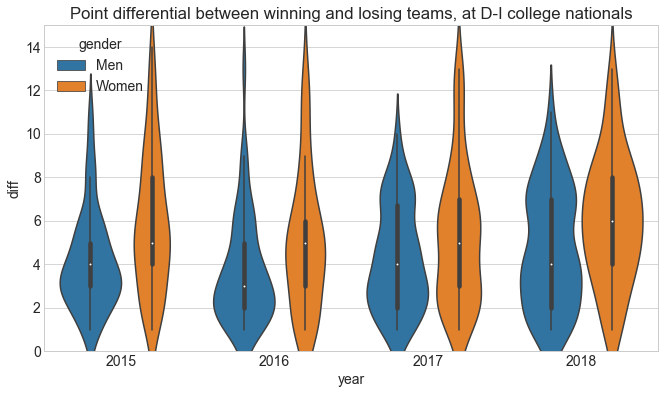

In [74]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=all_diffs, x="year", y="diff", hue="gender")
ax.set(ylim=(0, 15))
ax.set_title("Point differential between winning and losing teams, at D-I college nationals")
all_diffs.groupby("division")["diff"].describe()

,count,mean,std,min,25%,50%,75%,max
division,,,,,,,,
Men 2015,106.0,4.132075,2.251245,1.0,3.0,4.0,5.00,11.0
Men 2016,106.0,3.679245,2.459373,1.0,2.0,3.0,5.00,13.0
Men 2017,110.0,4.272727,2.373049,1.0,2.0,4.0,6.75,10.0
Men 2018,92.0,4.739130,2.696638,1.0,2.0,4.0,7.00,11.0
Women 2015,108.0,5.944444,3.191207,1.0,4.0,5.0,8.00,14.0
Women 2016,82.0,5.024390,3.138670,1.0,3.0,5.0,6.00,13.0
Women 2017,110.0,5.345455,3.160642,1.0,3.0,5.0,7.00,13.0
Women 2018,92.0,6.086957,2.896197,1.0,4.0,6.0,8.00,13.0


In [7]:
m2017 = Results.from_event("d1college", 2017, "Men")

In [8]:
m2017.load_from_csvs()

USAUResults<2017_d1college_nationals_men>

In [10]:
res = m2017.match_results

In [11]:
(res["Score"] - res["Opp Score"]).abs().describe()

count    110.000000
mean       4.272727
std        2.373049
min        1.000000
25%        2.000000
50%        4.000000
75%        6.750000
max       10.000000
dtype: float64

In [13]:
m2018 = Results.from_event("d1college", 2018, "Men")
m2018.load_from_csvs()

USAUResults<2018_d1college_nationals_men>

In [14]:
res = m2018.match_results

In [19]:
is_game = (res["Score"] + res["Opp Score"] > 0).values
(res.loc[is_game, "Score"] - res.loc[is_game, "Opp Score"]).abs().describe()

count    92.000000
mean      4.739130
std       2.696638
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max      11.000000
dtype: float64

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [16]:
res[]

,Unnamed: 0,As,Ds,Gs,Opp Score,Opp Seed,Opponent,Score,Seed,Team,Ts,url
0,0,15,6,15,9,20,Florida State,15,9,Pittsburgh,9,/teams/events/match_report/?EventGameId=v9pEa1...
1,1,9,3,9,15,9,Pittsburgh,9,20,Florida State,14,/teams/events/match_report/?EventGameId=v9pEa1...
2,0,14,15,14,8,16,Victoria,14,9,Pittsburgh,21,/teams/events/match_report/?EventGameId=Zfd8qU...
3,1,5,2,8,14,9,Pittsburgh,8,16,Victoria,23,/teams/events/match_report/?EventGameId=Zfd8qU...
4,0,0,0,0,11,17,Northwestern,15,4,Brown,0,/teams/events/match_report/?EventGameId=rGOHL%...
5,1,0,0,0,15,4,Brown,11,17,Northwestern,0,/teams/events/match_report/?EventGameId=rGOHL%...
6,0,13,11,13,14,18,Connecticut,13,14,William & Mary,20,/teams/events/match_report/?EventGameId=PFip0a...
7,1,14,4,14,13,14,William & Mary,14,18,Connecticut,18,/teams/events/match_report/?EventGameId=PFip0a...
8,0,15,9,15,6,19,Georgetown,15,3,Oregon,11,/teams/events/match_report/?EventGameId=ee%2fg...
9,1,6,5,6,15,3,Oregon,6,19,Georgetown,17,/teams/events/match_report/?EventGameId=ee%2fg...
